### CA1 @ EPS Course
#### Instructors: Dr. Bahrak, Dr. Vahabie
##### TAs: Sepanta Ghonoodi, Mohammad Khoshroo
---

*Full Name: Mohammad Mahdi Jadidi*

*SID: 810103382*

---

# R tutorial:
You can access a notebook introducing basic R syntax and functions here, if you are interested:

[Comprehensive R Programming Tutorial](https://colab.research.google.com/drive/1xOqhkMF-5DVmjHHdPtjDfi7_CaRvZjDk?usp=sharing)

You can access first computer assignment from one of the previous semesters here:

[CA1](https://colab.research.google.com/drive/13I9i0DwUgy7Nji1Ab6832pdAatXjnLuS?usp=sharing)

# Frequency Definition of Probability


One way of deﬁning the probability of an event is in terms of its relative frequency.

$$P(E) = \lim_{n \to \infty} \frac{n(E)}{n} $$

Where

$E$: an Event from the Sample Space S

$n$: Total number of experiments

$n(E)$: Number of times in the ﬁrst n repetitions of the experiment that the event E occurs


### Defining sample space and probability of each event


In [ ]:
S <- seq(1,6)
prob_dice <- rep(1/6, 6)

### Sampling(5 pts)


In [ ]:
roll_dice <- function(n) {
  sample(1:6, n, replace=TRUE)
}

roll_dice(10)

[1] 1 1 2 6 4 3 4 2 2 1

# Problem 1: Galileo's Problem(55 pts)


Suppose three dice are thrown and the three numbers obtained added. The total scores of 9, 10, 11, and 12 can all be obtained in six different combinations. Why then is a total score of 10 or 11 more likely than a total score of 9 or 12?


We now there are 6 ways to get a sum of 9, if you ignore the order of the dice:

- 3 + 3 + 3
- 2 + 3 + 4
- 2 + 2 + 5
- 1 + 4 + 4
- 1 + 3 + 5
- 1 + 2 + 6

and 6 ways to get a sum of 10:

- 3 + 3 + 4
- 2 + 4 + 4
- 2 + 3 + 5
- 2 + 2 + 6
- 1 + 4 + 5
- 1 + 3 + 6

So Based on classical definition of probability shouldn't they be equally likely?

let's figure out with sampling!


###  Simulating rolling n dices k times(5 pts)

Use `replicate()` function to simulate rolling 3 dices at a time


In [ ]:
sum_of_n_dices <- function(n, k) {
  result <- replicate(k,sum(sample(1:6, n, replace=TRUE)))
  return(result)
}


### Generate and Store Samples(10 pts)

Now repeat the experiment with 3 dices $10^k$ times, for k ranging from 2 to 6.

For each k:

- Count how many times we have a sum of 9, 10, 11, 12.
- Calculate the probability using frequency definition
- Store these probabilities in a data frame

You can use `table()` and `factor()` function to count the results if necessary.


In [ ]:
sample_sizes <- 10^(2:6)
sum_of_n_dices <- function(n, k) {
  replicate(k, sum(sample(1:6, n, replace = TRUE)))
}
sample_sizes <- 10^(2:6)
n <- 3
possible_sums <- n:(6 * n)
prob_df <- data.frame(
  sample_size = sample_sizes
)
for (k in sample_sizes) {
  sums <- sum_of_n_dices(n, k)
  probs <- table(sums) / k
  p_vec <- setNames(rep(0, length(possible_sums)), possible_sums)
  p_vec[names(probs)] <- probs
  prob_df[prob_df$sample_size == k, as.character(possible_sums)] <- p_vec
}
print(prob_df)

  sample_size        3        4        5        6       7        8        9
1       1e+02 0.010000 0.010000 0.010000 0.030000 0.07000 0.050000 0.160000
2       1e+03 0.006000 0.008000 0.025000 0.053000 0.07200 0.092000 0.118000
3       1e+04 0.004800 0.014100 0.028000 0.047800 0.07000 0.102900 0.111100
4       1e+05 0.004650 0.014360 0.027710 0.046360 0.06888 0.095380 0.117060
5       1e+06 0.004599 0.013905 0.027705 0.046402 0.06957 0.096867 0.115399
        10       11       12       13       14       15       16       17
1 0.180000 0.120000 0.080000 0.080000 0.110000 0.060000 0.010000 0.010000
2 0.136000 0.123000 0.097000 0.088000 0.070000 0.057000 0.033000 0.017000
3 0.120400 0.129400 0.111700 0.100900 0.067700 0.047100 0.026700 0.013500
4 0.125480 0.124630 0.115650 0.099380 0.068510 0.046010 0.027030 0.014180
5 0.125581 0.125072 0.115461 0.097495 0.069387 0.046434 0.027821 0.013756
        18
1 0.010000
2 0.005000
3 0.003900
4 0.004730
5 0.004546


### Visualize Probabilities(15 pts)


Plot the probabilities of the sums (9, 10, 11, 12) for 3 dices in a bar plot by completing the function.


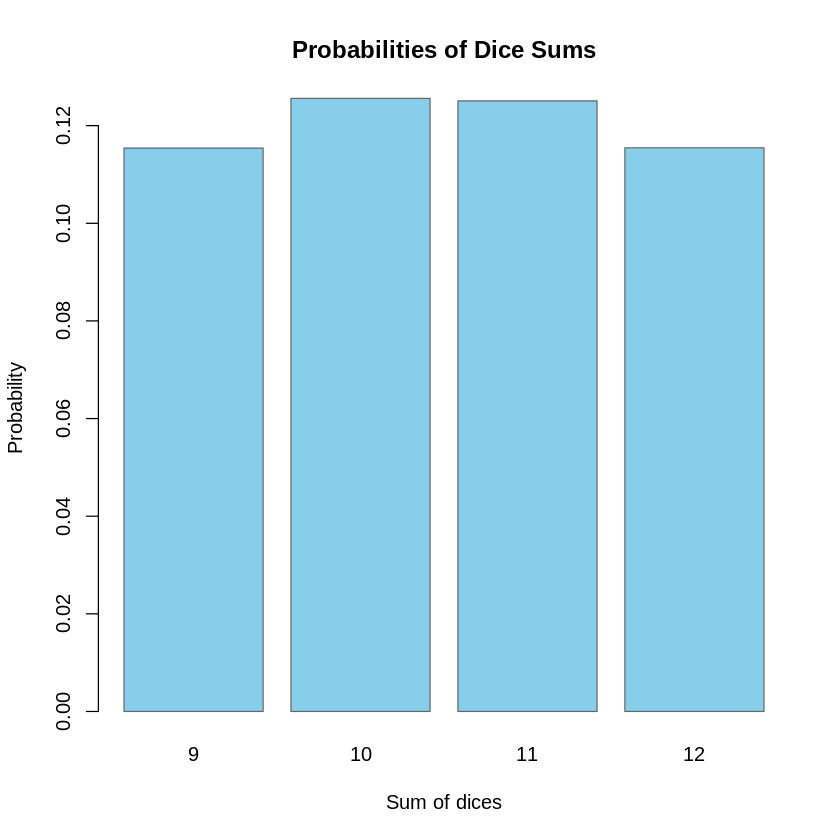

In [ ]:
plot_probabilities <- function(names, probs) {
    barplot(
    height = probs,
    names.arg = names,
    col = "skyblue",
    border = "gray40",
    main = "Probabilities of Dice Sums",
    xlab = "Sum of dices",
    ylab = "Probability"
  )
}
sample_size_to_plot <- 10^6

plot_row <- prob_df[prob_df$sample_size == sample_size_to_plot, ]

plot_col <- c("9", "10", "11", "12")

probs <- as.numeric(plot_row[plot_col])

plot_probabilities(names = plot_col, probs = probs)

- What do you see? Was ignoring count of permutations in the beginning correct or there is problem with the experiment?

    Answer:
At the beginning, when we simply summed random dice rolls without considering how many permutations (different combinations) can give the same total, we might have assumed that all sums (2, 3, …, 12) are equally likely
But in reality, they are not equally likely — for example, with two dice:
Only one way to get a 2 (1+1),
But six ways to get a 7 (1+6, 2+5, 3+4, 4+3, 5+2, 6+1).
So ignoring permutations was incorrect conceptually.
However, the experiment (simulation) itself is fine, because random sampling automatically accounts for the correct number of permutations — sums with more combinations occur more often

- Why doesn't classical definition of probability doesn't apply here?

    Answer:
Classical probability applies to equally likely outcomes
It doesn’t directly apply to sums unless we properly count how many equally likely outcomes correspond to each sum.
The experiment, on the other hand, uses random sampling — so it naturally captures the unequal likelihood of different sum

### Showing the correct value(15 pts)


Calculate the exact probability of the sum of three dice being 9 and 10 (you don’t need to show the detailed calculations in the notebook).

Use a line plot to demonstrate that, as the number of experiments increases, the relative frequencies converge to the calculated probabilities.

Add a horizontal line to indicate the calculated probability in the plot.

Use a logarithmic scale for the sample sizes on the chart.

In [ ]:
sample_sizes <- c(seq(100, 1000, 200),
                  seq(1000, 10000, 2000),
                  seq(10000, 100000, 20000),
                  seq(100000, 1000000, 200000))
sum_of_n_dices <- function(n, k) {
  replicate(k, sum(sample(1:6, n, replace = TRUE)))
}

p9_exact  <- 25 / 216
p10_exact <- 27 / 216
results <- data.frame(sample_size = sample_sizes, p9 = NA, p10 = NA)

for (k in sample_sizes) {
  sums <- sum_of_n_dices(3, k)
  probs <- table(sums) / k

  results[results$sample_size == k, "p9"]  <- probs["9"]
  results[results$sample_size == k, "p10"] <- probs["10"]
}

results[is.na(results)] <- 0
print(results)



   sample_size        p9       p10
1        1e+02 0.0800000 0.1600000
2        3e+02 0.1033333 0.1166667
3        5e+02 0.1140000 0.1400000
4        7e+02 0.1214286 0.1285714
5        9e+02 0.1044444 0.1366667
6        1e+03 0.1090000 0.1280000
7        3e+03 0.1096667 0.1253333
8        5e+03 0.1148000 0.1248000
9        7e+03 0.1148571 0.1252857
10       9e+03 0.1121111 0.1281111
11       1e+04 0.1123000 0.1276000
12       3e+04 0.1159333 0.1260333
13       5e+04 0.1136800 0.1245200
14       7e+04 0.1156857 0.1231857
15       9e+04 0.1168333 0.1245778
16       1e+05 0.1155300 0.1244800
17       3e+05 0.1161600 0.1252967
18       5e+05 0.1149440 0.1253160
19       7e+05 0.1159529 0.1252971
20       9e+05 0.1160989 0.1252756


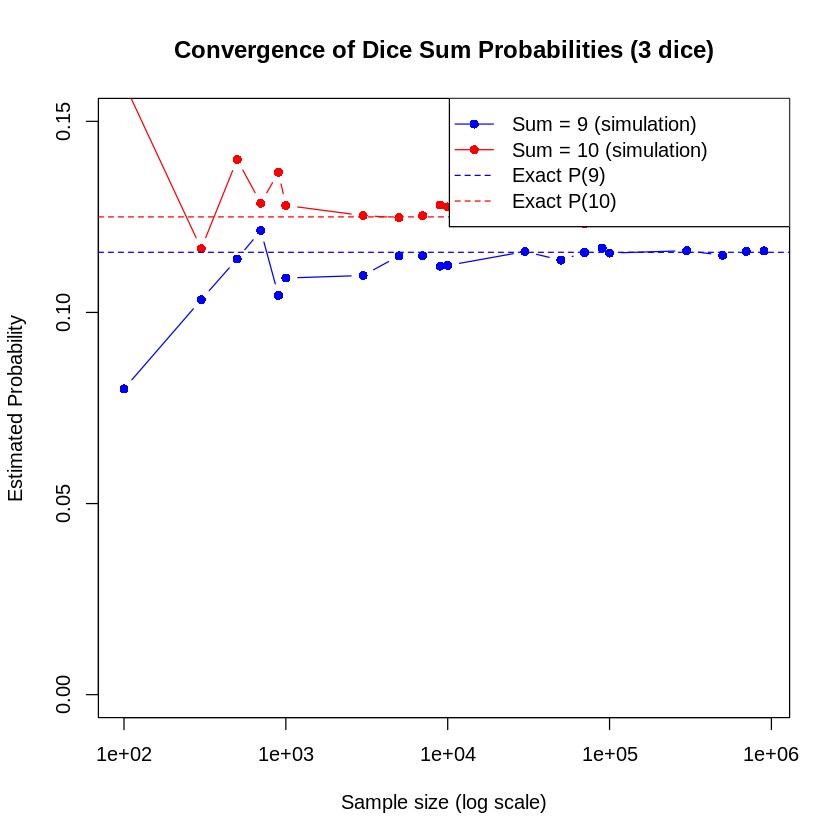

In [ ]:
#TODO: Create a line chart based on probabilities in the previous cell.
##################################################################
plot(results$sample_size, results$p9,
     type = "b", log = "x", col = "blue", pch = 16, ylim = c(0, 0.15),
     xlab = "Sample size (log scale)",
     ylab = "Estimated Probability",
     main = "Convergence of Dice Sum Probabilities (3 dice)")

lines(results$sample_size, results$p10, type = "b", col = "red", pch = 16)
abline(h = p9_exact,  col = "blue", lty = 2)
abline(h = p10_exact, col = "red",  lty = 2)
legend("topright",
       legend = c("Sum = 9 (simulation)", "Sum = 10 (simulation)",
                  "Exact P(9)", "Exact P(10)"),
       col = c("blue", "red", "blue", "red"),
       lty = c(1, 1, 2, 2),
       pch = c(16, 16, NA, NA))
##################################################################

### Increasing Number of Dices(10 pts)
Here, we analyze the distribution of dice sums and observe how it evolves with an increasing number of dice.

In [ ]:
plot_distribution_of_sum_of_n_dices <- function(n, k) {
  # This function simulates rolling n dice for k experiments and plots the
  # resulting probability distribution of their sums using a bar chart.
  #TODO#########################################################
    sums <- replicate(k, sum(sample(1:6, n, replace = TRUE)))
    probs <- table(sums) / k
    sums_vals <- as.numeric(names(probs))
      barplot(
    height = probs,
    names.arg = sums_vals,
    col = "skyblue",
    border = "gray40",
    main = paste("Distribution of the Sum of", n, "Dice (k =", k, ")"),
    xlab = "Sum of dice",
    ylab = "Estimated Probability"
  )
}

Call `plot_distribution_of_sum_of_n_dices` with different dice counts and 10⁵ experiments.

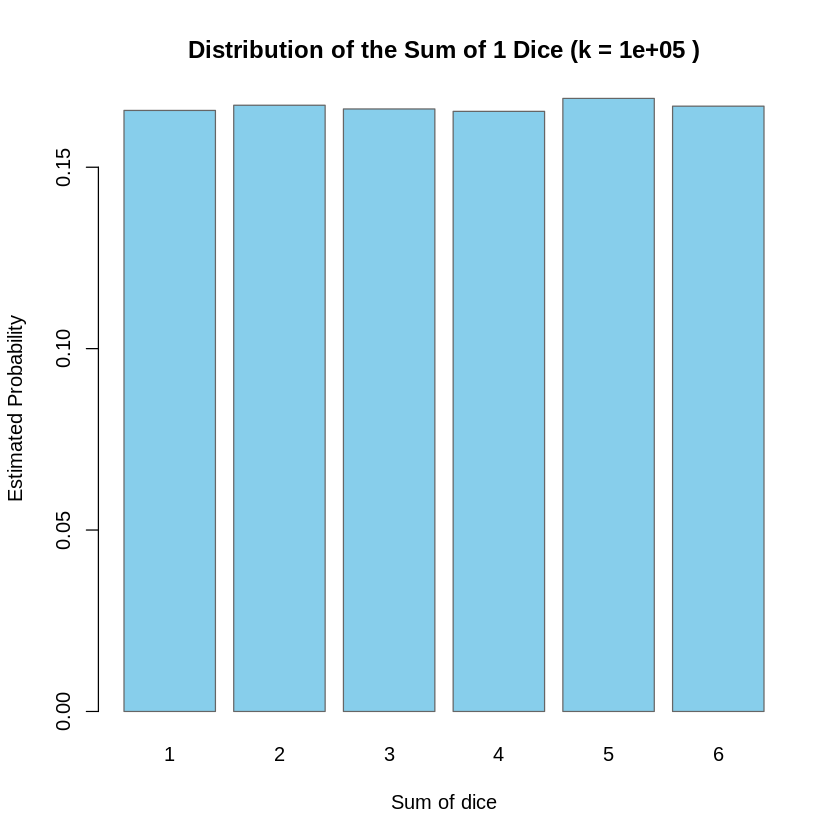

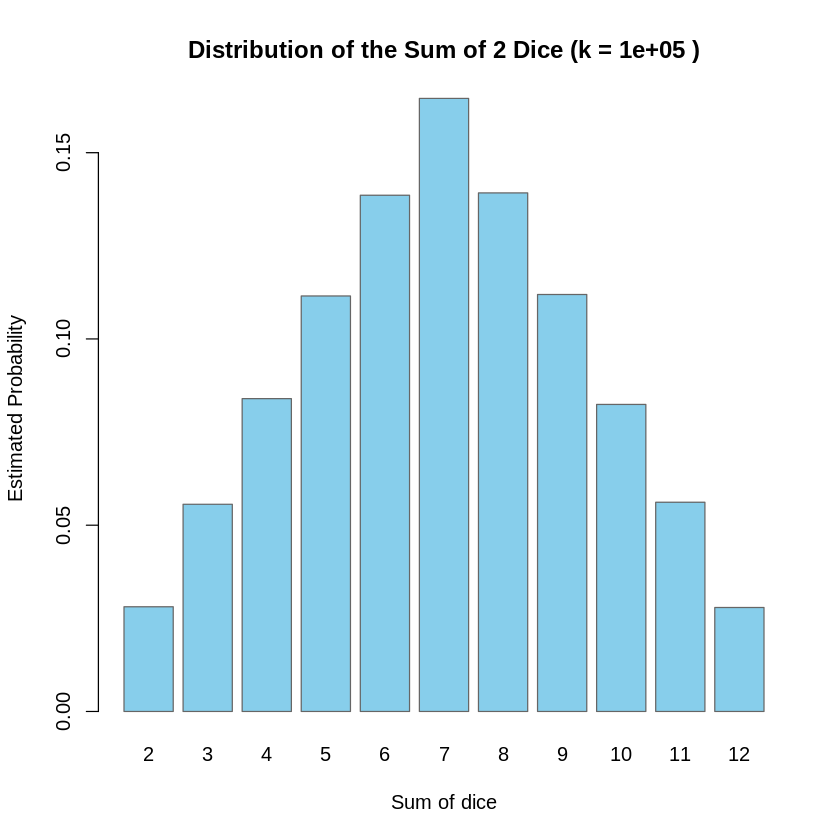

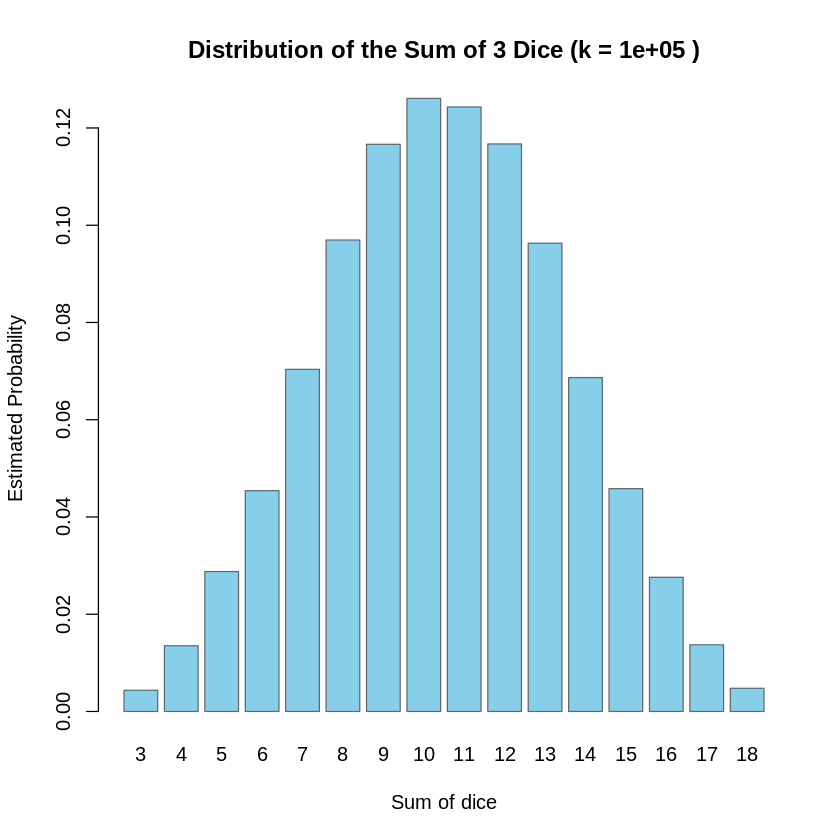

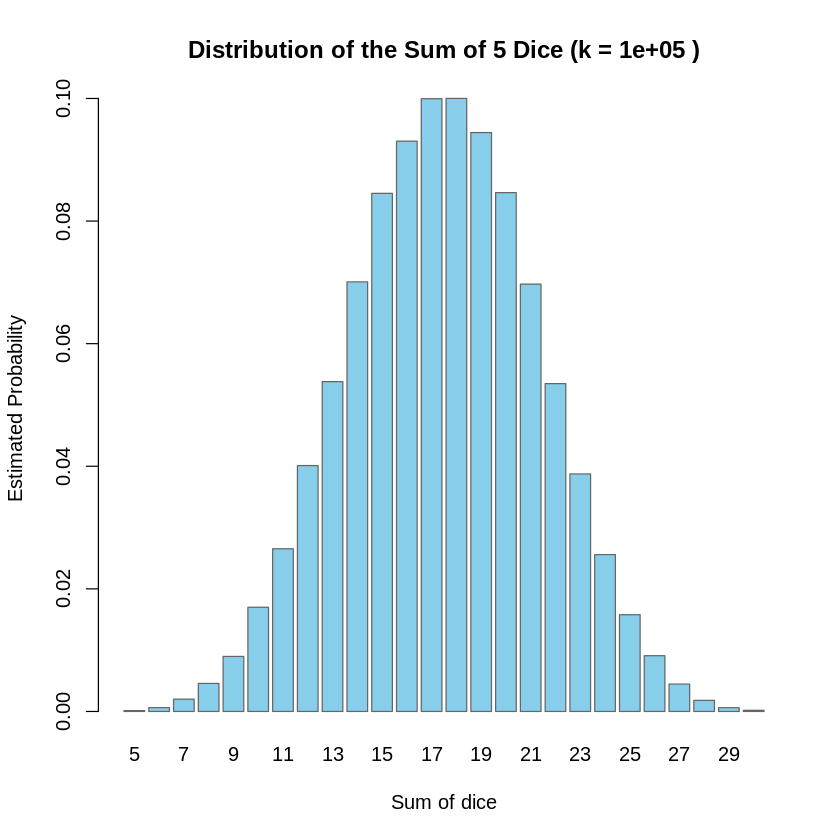

In [ ]:
dice_counts <- c(3,5,10,15,20,50,100)
#TODO############################################################

plot_distribution_of_sum_of_n_dices(1, 10^5)
plot_distribution_of_sum_of_n_dices(2, 10^5)
plot_distribution_of_sum_of_n_dices(3, 10^5)
plot_distribution_of_sum_of_n_dices(5, 10^5)


# Problem 2: New class order(40 pts)


In this question you will see that some probability problems are very hard to solve by theory, but become much easier if you use sampling and the frequentist interpretation of probability.


In a university classroom, n students are sitting in a row. After the class ends, they all go outside for a break. When they return, they decide to sit again on the same row, but this time they each choose a seat at random, resulting in a uniform random permutation of the seating order.

Since every pair of neighbors had an argument during the first class and now hate each other, the students want to know:

What is the probability that, in the new seating, There exists two students that sit next to someone they were seated next to in the original arrangement?


### Step 1: Simulate a random sitting order(5 pts)


In [ ]:
random_sitting_order <- function(n){
#TODO: n = number of students.##########################
new_order <- sample(1:n)

}

### Step 2: create a new permutation and find if there are similar neighbors(10 pts)


Suppose students are initially seated in order from 1 to n. In the next arrangement, they are placed in a new random order. Determine whether any two neighbors from the original order remain neighbors in the new order.

In [4]:
has_similar_neighbors <- function(students_count) {
  new_order <- sample(1:students_count)
  for (i in 1:(students_count - 1)) {
    pos1 <- which(new_order == i)
    pos2 <- which(new_order == i + 1)
    if (abs(pos1 - pos2) == 1) {
      return(TRUE)
    }
  }
  return(FALSE)
}

### Step3: Conduct the experiment N times(5 pts)


Here you should:
- Conduct the experiment N times.
- See how many times there are similar neighbors
- Calculate probability using frequency definition and return it.

In [5]:
similar_neighbors_probability <- function(N, students_count) {
  success_count <- 0
  for (i in 1:N) {
    if (has_similar_neighbors(students_count)) {
      success_count <- success_count + 1
    }
  }
  probability <- success_count / N
  return(probability)
}

### Step 4:(10 pts)
Conduct the experiment for these sample sizes with 5 students.

Print the probabilities for each sample size.

In [6]:

sample_sizes <-  c(seq(100,1000,200), seq(1000,10000,2000), seq(10000,100000,20000), seq(100000,1000000,200000))
#TODO#############################################################
students_count <- 5
probabilities <- numeric(length(sample_sizes))
for (i in seq_along(sample_sizes)) {
  N <- sample_sizes[i]
  probabilities[i] <- similar_neighbors_probability(N, students_count)
}
results <- data.frame(Sample_Size = sample_sizes, Probability = probabilities)
print(results)


   Sample_Size Probability
1        1e+02   0.8500000
2        3e+02   0.8833333
3        5e+02   0.8900000
4        7e+02   0.8842857
5        9e+02   0.8788889
6        1e+03   0.8760000
7        3e+03   0.8896667
8        5e+03   0.8862000
9        7e+03   0.8895714
10       9e+03   0.8838889
11       1e+04   0.8834000
12       3e+04   0.8833000
13       5e+04   0.8849400
14       7e+04   0.8850000
15       9e+04   0.8839778
16       1e+05   0.8827800
17       3e+05   0.8830767
18       5e+05   0.8830880
19       7e+05   0.8831843
20       9e+05   0.8837767


Show the probabilities in the You calculated in a line chart.

Use log scale for sample sizes.

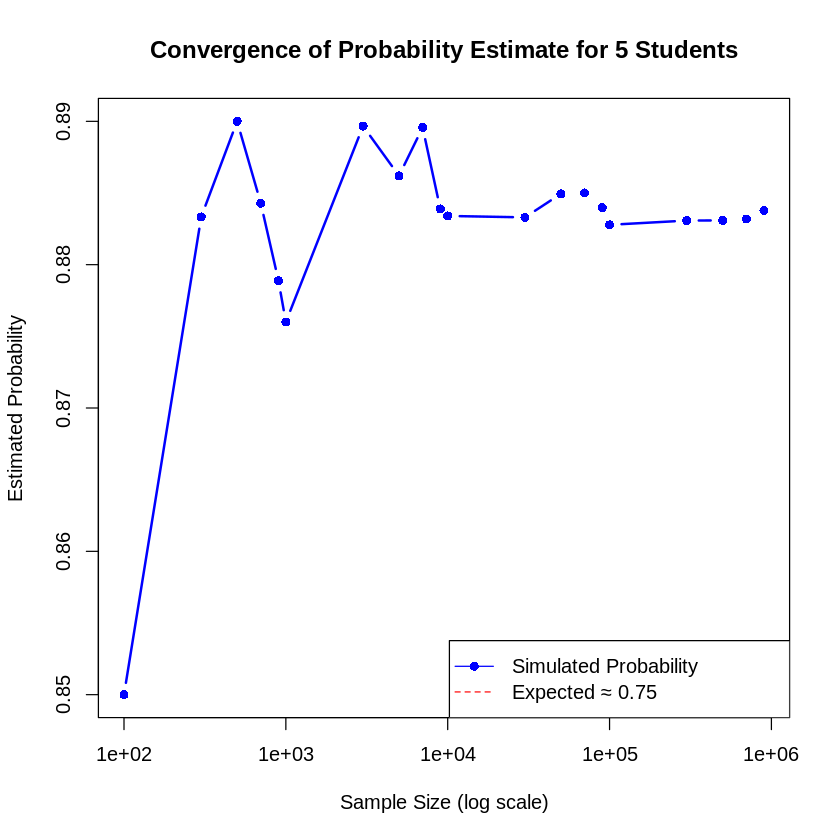

In [7]:
#TODO#############################################################
plot(results$Sample_Size, results$Probability,
     type = "b", log = "x", col = "blue", pch = 16, lwd = 2,
     xlab = "Sample Size (log scale)",
     ylab = "Estimated Probability",
     main = "Convergence of Probability Estimate for 5 Students")
abline(h = 0.75, col = "red", lty = 2)
legend("bottomright",
       legend = c("Simulated Probability", "Expected ≈ 0.75"),
       col = c("blue", "red"),
       lty = c(1, 2),
       pch = c(16, NA))

### Step 5:(10 pts)
In this step, we want to examine the effect of increasing the number of students on the probability.

Calculate the probability that two students sit next to each other again, using a sample size of $10^6$, for 3 to 20 students.

Display the results in a line chart.

   Students Probability
1         3      1.0000
2         4      0.9199
3         5      0.8790
4         6      0.8728
5         7      0.8776
6         8      0.8724
7         9      0.8690
8        10      0.8718
9        11      0.8672
10       12      0.8641
11       13      0.8671
12       14      0.8672
13       15      0.8644
14       16      0.8664
15       17      0.8664
16       18      0.8656
17       19      0.8673
18       20      0.8666


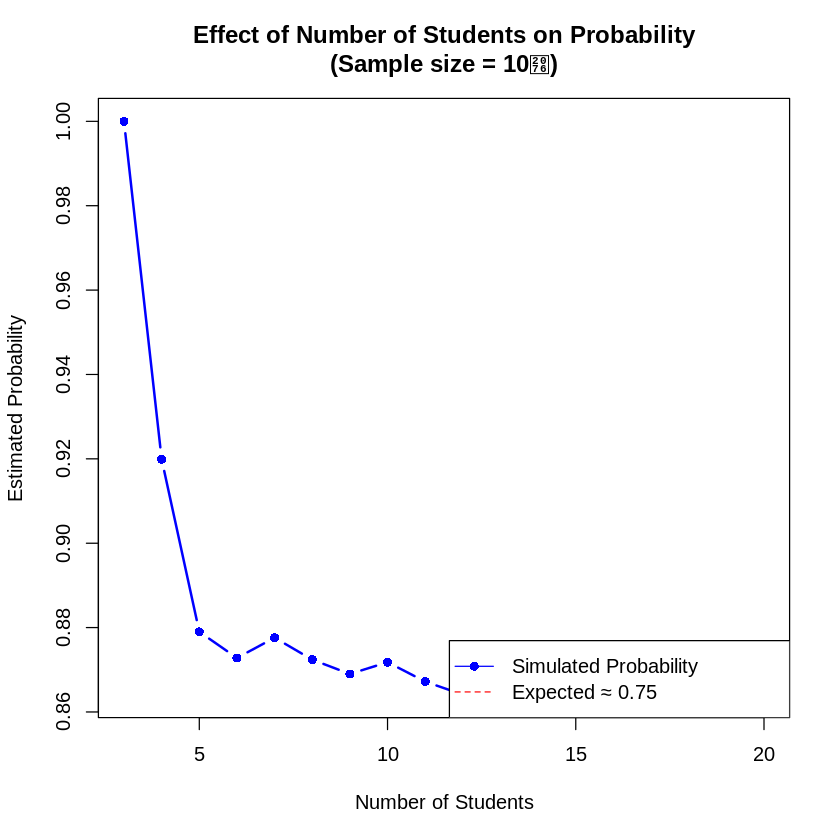

In [9]:
students_counts <- 3:20
sample_size <- 10^6

probabilities <- numeric(length(students_counts))
for (i in seq_along(students_counts)) {
  n <- students_counts[i]
  probabilities[i] <- similar_neighbors_probability(sample_size, n)
}

results_students <- data.frame(
  Students = students_counts,
  Probability = probabilities
)

print(results_students)

plot(results_students$Students, results_students$Probability,
     type = "b", pch = 16, col = "blue", lwd = 2,
     xlab = "Number of Students",
     ylab = "Estimated Probability",
     main = "Effect of Number of Students on Probability\n(Sample size = 10⁶)")
abline(h = 0.75, col = "red", lty = 2)
legend("bottomright",
       legend = c("Simulated Probability", "Expected ≈ 0.75"),
       col = c("blue", "red"),
       lty = c(1, 2),
       pch = c(16, NA))


Now you can see the theoretical way to solve this question using inclusion-exclusion principle.
(Reading part is optional and This part is meant to show you that in some problems sampling is much easier.)

We assume that the initial order of seating is $A, B, C, D$.

We define a function $T(XY)$ that indicates the number of arrangements in which $X$ and $Y$ are seated next to each other.

We know that the total number of arrangements is $5!$. Now, we can determine the number of undesirable cases using Inclusion-Exclusion principle.
$$
\big(|T(AB)| + |T(BC)| + |T(CD)| + |T(DE)|\big)
- \big(|T(AB) \cap T(BC)| + |T(AB) \cap T(CD)| + |T(AB) \cap T(DE)| + \cdots \big) + \cdots
$$

In the above expression, each sentence cannot be calculated separately.
$$|T(AB)| = |T(BC)| = |T(CD)| = |T(DE)| = 2 \times 4! = 48$$


In the case of invalid sequences, we have 4 sequences in the form
$(|T(XY)|)$.

Therefore, in total we will have:
$ 48 \times 4 = 192 $ undesirable elements.

$$|T(AB) \cap T(BC)| = |T(BC) \cap T(CD)| = |T(CD) \cap T(DE)| = 2 \times 3! = 12$$

The expression $T(BC) \cap T(AB)$ represents the set of sequences in which $A$ and $B$ are adjacent, and $B$ and $C$ are also adjacent.
In the case of invalid sequences, we have 3 sequences in this form; thus, in total we will have:  $12 \times 3 = 36 $

$$|T(AB) \cap T(CD)| = |T(AB) \cap T(DE)| = |T(BC) \cap T(DE)| = 2^2 \times 3! = 24$$

The expression $T(AB) \cap T(CD)$ represents the set of sequences in which $A$ and $B$ are adjacent, and $C$ and $D$ are also adjacent.
In the case of invalid sequences, we have 3 sequences in this form; thus, in total we will have:  $24 \times 3 = 72 $

$$|T(AB) \cap T(BC) \cap T(CD)| =$$
$$|T(BC) \cap T(CD) \cap T(DE)| = 2 \times 2! = 4$$


The expression $T(AB) \cap T(BC) \cap T(CD)$ represents the set of sequences in which $A$, $B$, $C$ and $D$ are adjacent.
In the case of invalid sequences, we have 2 sequences in this form; thus, in total we will have:  $2 \times 4 = 8 $

$$|T(AB) \cap T(BC) \cap T(DE)| =$$
$$|T(AB) \cap T(CD) \cap T(DE)| = 2^2 \times 2! = 8$$


The expression $T(AB) \cap T(BC) \cap T(DE)$ represents the set of sequences in which $A$, $B$ and $C$  are adjacent, and $D$ and $E$ are also adjacent.
In the case of invalid sequences, we have 2 sequences in this form; thus, in total we will have:  $2 \times 8 = 16 $


$$|T(AB) \cap T(BC) \cap T(CD) \cap T(DE)| = $$ $$2 \times 1! = 2$$

The expression $T(AB) \cap T(BC) \cap T(CD) \cap T(DE)$ represents a set of arrangements
in which each individual is next to individuals who were next to them in previous arrangements.
This set has only two members.

Therefore all invalid sequences will be:
$$192-(36+72)+(8+16)-2 = 106$$

And valid sequences will be:

$$5!-106 = 14 $$
And the desired probability(probability of each person sitting next to a new person):
$$\frac{14}{5!} = 0.116667$$
The probability that there exists a pair sitting next to each other again is:
$$ 1- \frac{14}{5!} = 0.8833 $$
Does this match with your observation?
